# Scraping StackOverflow

In this project, we will scrap StackOverflow website and list the top languages being mentioned/tagged alongwith their tag counts. 

In [1]:
from urllib.request import urlopen
import urllib.parse
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot as mp
%matplotlib inline

style.use('fivethirtyeight')

# Reading html file into content variable using urlopen
content = urlopen('http://stackoverflow.com/tags?tab=popular')

# Parsing html data using BeautifulSoup
soup = bs(content, 'html.parser')

## Getting List of Top Languages

In [2]:
lang_list = []

# Looping through all the a tag elements with class 'post-tag' to get language's name
for tag in soup.find_all('a',attrs={'class':'post-tag'}):
        lang_list.append(tag.text)
        
print(lang_list)

['javascript', 'java', 'c#', 'php', 'android', 'python', 'jquery', 'html', 'c++', 'ios', 'css', 'mysql', 'sql', 'asp.net', 'ruby-on-rails', 'c', 'arrays', 'r', 'objective-c', '.net', 'node.js', 'json', 'sql-server', 'angularjs', 'swift', 'iphone', 'regex', 'ruby', 'ajax', 'django', 'excel', 'xml', 'asp.net-mvc', 'linux', 'angular', 'python-3.x']


## Getting List of Tag Counts of the Top Languages

In [3]:
count_list = []

# Looping through all the span elements with class 'item-multiplier-count' to get tag counts
for count in soup.find_all('span',attrs={'class':'item-multiplier-count'}):
        count_list.append(int(count.text))
        
print(count_list)

[1810675, 1548565, 1312460, 1284007, 1194424, 1171395, 953990, 823084, 618008, 598697, 586189, 560801, 491843, 346075, 306284, 303427, 295765, 289905, 287493, 283264, 275299, 262328, 260232, 258136, 230329, 219896, 207367, 204548, 199318, 198095, 194706, 183252, 180625, 176113, 166774, 161124]


### Visualising Top Languages

In [19]:
ax.bar?

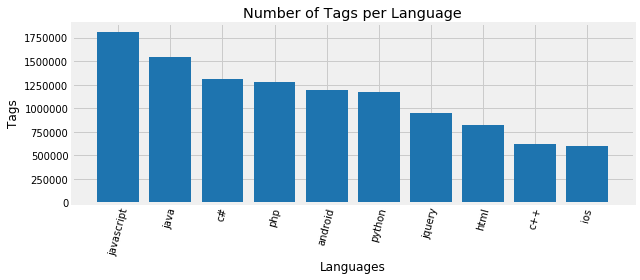

In [36]:
import matplotlib
import numpy as np
from numpy import arange

# colors = matplotlib.cm.get_cmap('viridis')
# arr1 = np.append(arange(0, 0.9, 0.1), [0.99])
# rgba = list(colors(i) for i in arr1)

fig, ax = plt.subplots(figsize=(9,4))
ax.bar(lang_list[:10], count_list[:10], color='#1E74AF')
plt.xticks(rotation=75)
plt.xlabel('Languages')
plt.ylabel('Tags')
plt.title('Number of Tags per Language')
plt.tight_layout()
mp.savefig('comparison.png')
plt.show()

***Getting list of top languages and their respective tag counts was straight and easy.<br> But, scraping top question and respective top answer is a multi-step process:***

***Steps to extract Top Question and respective Top Answer:***
>  Build url for the language page, given language name.<br>
 Parse and scrape that url to extract link of top question.<br>
 Again, build url with extracted link.<br>
 parse and scrape that url to get top question and respectibe top answer.

## Getting List of Top Question's URL

In [6]:
import urllib.parse
question_page_urls = []

# Looping through list of top languages
for elem in lang_list:
    
    # Building URL
    # One important thing to note here is that we need to convert string elements into form expected in a url. 
    # For example, C# would need to be converted to c%23.
    # For that, we will use 'urlib.parse'. It will quote special symbols into URL-Specific format.
    lang_sub_page_url = 'https://stackoverflow.com/questions/tagged/' + urllib.parse.quote(elem) + '?sort=votes&pageSize=15'
    
    # Scraping Webpage
    lang_sub_page_content = urlopen(lang_sub_page_url).read()
    soup1 = bs(lang_sub_page_content, 'html.parser')
    
    # Extracting link for top question using href attribute of anchor tag element with class 
    # 'question-hyperlink'
    question_page_link = soup1.find('a', class_ = 'question-hyperlink')['href']
    
    # Building URL for Top Question Page using extracted link
    question_page_urls.append('https://stackoverflow.com' + question_page_link)
    
question_page_urls

['https://stackoverflow.com/questions/503093/how-do-i-redirect-to-another-webpage',
 'https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array',
 'https://stackoverflow.com/questions/7074/what-is-the-difference-between-string-and-string-in-c',
 'https://stackoverflow.com/questions/3737139/reference-what-does-this-symbol-mean-in-php',
 'https://stackoverflow.com/questions/2025282/what-is-the-difference-between-px-dip-dp-and-sp',
 'https://stackoverflow.com/questions/231767/what-does-the-yield-keyword-do',
 'https://stackoverflow.com/questions/503093/how-do-i-redirect-to-another-webpage',
 'https://stackoverflow.com/questions/8318911/why-does-html-think-chucknorris-is-a-color',
 'https://stackoverflow.com/questions/11227809/why-is-it-faster-to-process-a-sorted-array-than-an-unsorted-array',
 'https://stackoverflow.com/questions/1054558/vertically-align-text-to-top-within-a-uilabel',
 'https://stackoverflow.com/questions/8318911/why-do

## Extracting Top Question and Answer in Each Language

In [7]:
question_list = []
answer_list = []

# Looping through each Top Question URL
for item in question_page_urls:
    
    # Reading and Scraping Webpage
    page_content = urlopen(item).read()
    soup2 = bs(page_content, 'html.parser')
    
    # Extracting Question using text of anchor tag with class 'question-hyperlink'
    question_list.append(soup2.find('a', class_ = 'question-hyperlink').text)

    # Extracting Answer using text from first child of div tag with class 'answercell'
    answer_list.append(soup2.find('div', class_ = 'answercell').findChild().text)
    
print(question_list[:5])
answer_list[0]

['How do I redirect to another webpage?', 'Why is it faster to process a sorted array than an unsorted array?', 'What is the difference between String and string in C#?', 'Reference — What does this symbol mean in PHP?', 'What is the difference between “px”, “dip”, “dp” and “sp”?']


'\nOne does not simply redirect using jQuery\njQuery is not necessary, and window.location.replace(...) will best simulate an HTTP redirect.  \nwindow.location.replace(...) is better than using window.location.href, because replace() does not keep the originating page in the session history, meaning the user won\'t get stuck in a never-ending back-button fiasco.\n\nIf you want to simulate someone clicking on a link, use\n  location.href\nIf you want to simulate an HTTP redirect, use location.replace\n\nFor example:\n// similar behavior as an HTTP redirect\nwindow.location.replace("http://stackoverflow.com");\n\n// similar behavior as clicking on a link\nwindow.location.href = "http://stackoverflow.com";\n\n'

## Merging them into a DataFrame

In [8]:
df = pd.DataFrame(
    {'Language': lang_list,
     'Tag Count': count_list,
     'Top Question': question_list,
     'Top Answer' : answer_list
    })

df.head()

,Language,Tag Count,Top Question,Top Answer
0,javascript,1775684,How do I redirect to another webpage?,\nOne does not simply redirect using jQuery\nj...
1,java,1523913,Why is it faster to process a sorted array tha...,\nYou are a victim of branch prediction fail.\...
2,c#,1292733,What is the difference between String and stri...,\nstring is an alias in C# for System.String.\...
3,php,1268489,Reference — What does this symbol mean in PHP?,\nIncrementing / Decrementing Operators\n++ in...
4,android,1179271,"What is the difference between “px”, “dip”, “d...",\nFrom the Android Developer Documentation:\n\...
